In [ ]:
# Bibliotecas necessárias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
# Leitura dos dados

demandareal = pd.read_excel("./setembro2021.xlsx")
demandareal = demandareal["CONSUMO"].values
teste = np.reshape(demandareal,(30,24))


In [ ]:
# Função objetivo a ser minimizada, com penalidade de demanda

def fitness(individuo,demanda,volume_maximo,volume_minimo,custo,vazao,check = 0):

    volume = volume_maximo

    fit = np.sum(custo[individuo])
    volume_t = individuo*vazao - demanda
    volume_t = np.array([volume] + list(volume_t))
    volume_t = np.cumsum(volume_t)
    volume_penal = volume_t[(volume_t <volume_minimo)| (volume_t  >volume_maximo)]

    if(check == 1):
        print(volume_penal,fit,len(volume_penal))

    fit += fit*(np.sum(np.abs(volume_penal-volume)))
    return fit

In [ ]:
# Definição da tarifa:

def S(t):
    hora = t % 24  # Calcula a hora do dia a partir do índice t
    if hora >= 17 and hora < 21:  # Horário de ponta
        return 1.63527
    else:  # Horário fora de ponta
        return 0.62124
        
tarifa = np.array([S(i) for i in range(len(demandareal))])
tarifa.shape

In [ ]:
# Seleção
def selecao(populacao, aptidao):
    aid = np.random.choice(len(populacao), size=2, replace=False)
    bid = np.random.choice(len(populacao), size=2, replace=False)
    
    aid = aid[np.argmax(aptidao[aid])]
    bid = bid[np.argmax(aptidao[bid])]
    a = populacao[aid]
    b = populacao[bid]
    apt = aptidao[aid]
    bpt = aptidao[bid]
    
    return np.array([a, b]), np.array([apt, bpt])

In [ ]:
# Cruzamento

def cruzamento(pais,aptidao,procruz):
    if(np.random.rand()<procruz):
        p = 1 - aptidao/(np.sum(aptidao))
        filho = np.array([pais[0][i] if(np.random.rand() < p[0]) else pais[1][i] for i in range(pais.shape[1])])
    else:
        filho = pais[np.argmin(aptidao),:]
    return filho 

In [ ]:
# Mutação

def mutacao(individuo, probmut):
    n = len(individuo)
    copia = np.copy(individuo)
    num_mutacoes = int(probmut * n)
    idx = np.random.choice(n, size=num_mutacoes, replace=False)

    for i in range(num_mutacoes):
        gene = idx[i]
        novo_valor = np.random.uniform(0, 1)
        novo_gene = 0 if novo_valor <= 0.5 else 1
        copia[gene] = novo_gene

    return copia

In [ ]:
def AG(demandareal,tarifa,volume_maximo,volume_minimo,vazao,taxa_cruzamento,probmut,num_individuals):
    np.random.seed(424)
    num_genes = len(demandareal)
    populacao = np.random.choice([True, False], size=(num_individuals,num_genes))
    F = lambda individuo: fitness(individuo, demandareal, volume_maximo, volume_minimo, tarifa, vazao)
    aptidao = np.array([F(individuo) for individuo in populacao])
    
    historico = []
    contador = 0
    while True:
        
        pais,apt = selecao(populacao,aptidao)

        filho = cruzamento(pais,apt,taxa_cruzamento)
        filho = mutacao(filho,probmut)

        populacao[np.argmax(aptidao),:] = filho
        aptidao[np.argmax(aptidao)] = F(filho)

         # Guarda o melhor indivíduo e sua aptidão
        melhor_individuo = populacao[np.argmin(aptidao)]
        melhor_aptidao = aptidao[np.argmin(aptidao)]

        populacao[np.argmax(aptidao),:] = filho
        aptidao[np.argmax(aptidao)] = F(filho)

        # Verifica se o melhor indivíduo foi substituído
        if aptidao[np.argmin(aptidao)] > melhor_aptidao:
            # Substitui o pior indivíduo pelo melhor indivíduo guardado
            populacao[np.argmax(aptidao)] = melhor_individuo
            # Atualiza a aptidão do pior indivíduo
            aptidao[np.argmax(aptidao)] = melhor_aptidao

        historico.append([aptidao[np.argmin(aptidao)],np.mean(aptidao)])

        if(np.mean(aptidao) - aptidao[np.argmin(aptidao)] < 1e-5):
            break
        contador += 1
        if(contador%1000 == 0):
            print(aptidao[np.argmin(aptidao)])
        if(aptidao[np.argmin(aptidao)] < 6000):
            break
        
    historico = np.array(historico)
    return historico,populacao[np.argmin(aptidao)]

In [166]:
# Tamanho da solução binária

#num_genes = len(demandareal)

# Número de indivíduos na população inicial
volume_maximo = 5
volume_minimo = 2
vazao = 2

# Parâmetros genéticos:

procruz = 0.7
probmut = 0.01
num_individuals = 200 #tamanho da população
#geracoes = 8000

# Algoritmo Genético:

# Criação da população inicial

dados,melhor_valor = AG(demandareal,tarifa,volume_maximo,volume_minimo,vazao,procruz,probmut,num_individuals)


15537.354364501323
15537.354364501323
15537.354364501323
15537.354364501323
15537.354364501323
15537.354364501323
15537.354364501323
15537.354364501323
15537.354364501323
15537.354364501323
14910.741136501581
14910.741136501581
14910.741136501581
14910.741136501581
14910.741136501581
14910.741136501581
14910.741136501581
14910.741136501581
14910.741136501581
14910.741136501581
14910.741136501581
14910.741136501581
14910.741136501581
14910.741136501581
14698.873959001568
14698.873959001568
14698.873959001568
14698.873959001568
14698.873959001568
14698.873959001568
14698.873959001568
14698.873959001568
14698.873959001568
14698.873959001568
14698.873959001568
14698.873959001568
14698.873959001568
14698.873959001568
14698.873959001568
14698.873959001568
14698.873959001568
14698.873959001568
14698.873959001568
14698.873959001568
14698.873959001568
13627.174717801061
13627.174717801061
13627.174717801061
13627.174717801061
13627.174717801061
13627.174717801061
13627.174717801061
13627.174717

In [167]:
fitness(melhor_valor, demandareal, volume_maximo, volume_minimo, tarifa, vazao,1)


[6.38 6.34 6.31 6.29 6.26 6.24 6.21 5.57 5.21 5.21 5.21 6.1  6.06 8.06
 7.12 5.54 6.54 6.54 6.54 5.44 5.82 6.4  1.97 5.45 5.45 7.45 6.55 7.04
 5.49 5.85 5.58 6.38 6.35 6.35 6.35 6.12 1.37 5.66 7.66 7.66 6.2  6.6
 5.01 5.57 5.57 5.57 5.57 5.57 5.56 5.56 5.56 5.56 5.56 5.56 7.56 7.35
 5.74 6.11 5.48 5.48 5.48 5.48 5.48 5.48 5.48 5.47 5.47 5.47 5.46 5.46
 5.46 5.46 7.46 6.92 5.31 6.22 6.22 6.22 6.22 6.22 6.21 5.85 6.23 5.02
 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02
 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02
 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 5.02 7.02 7.02 7.02 6.33
 5.73 5.1  6.73 6.73 6.53 6.91 5.3  5.75 5.75 5.75 5.75 5.75 5.75 5.68
 1.2  6.19 8.18 8.18 6.84 5.25 5.53 1.64 1.43 1.42 5.42 5.42 6.12 5.02
 5.9  5.9  5.9  5.89 6.34 5.23 5.01 5.26] 41.16618000000001 162


5935.339832400746

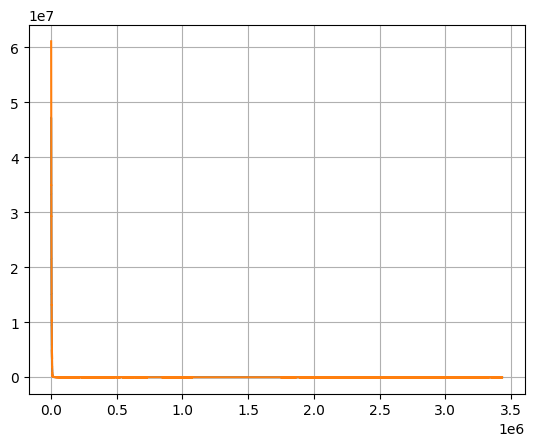

In [168]:
plt.plot(range(len(dados.T[0])),dados.T[0])
plt.plot(range(len(dados.T[0])),dados.T[1])
plt.grid()
plt.show()

In [169]:
# Código para calcular a distância média entre os indivíduos
populacao_int = populacao.astype(int)
distancias = np.sum(np.abs(populacao_int[:, None] - populacao_int), axis=2)
distancia_media = np.mean(distancias)
print("Distância média entre os indivíduos:", distancia_media)

# Código para calcular a entropia da população
frequencias = np.mean(populacao, axis=0)
entropias = -frequencias * np.log(frequencias) - (1 - frequencias) * np.log(1 - frequencias)
entropia_populacao = np.mean(entropias)
print("Entropia da população:", entropia_populacao)

# Código para calcular o número de indivíduos únicos na população
populacao_str = np.array([''.join(map(str, individuo)) for individuo in populacao])
individuos_unicos = np.unique(populacao_str)
numero_individuos_unicos = len(individuos_unicos)
print("Número de indivíduos únicos na população:", numero_individuos_unicos)

NameError: name 'populacao' is not defined